In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from bayes_opt import BayesianOptimization

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
import pickle

In [54]:
from hyperopt import hp
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [55]:
%matplotlib inline
sns.set_style('whitegrid')

In [56]:
import warnings
warnings.filterwarnings("ignore")

## Problem Statement
<b>Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.   
It is important to make the rental bike available and accessible to the public   
at the right time as it lessens the waitingtime. 
Eventually, providing the city with a stable supply of rental bikes becomes a major concern.   
The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.</b>  

<b>The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint,   
Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>

## DataFrame Loading and Cleaning

In [57]:
df = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')


In [58]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Checking for null values

In [60]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [61]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [62]:
# Bike count is recorded on 12 every month from Jan to Dec 2017
df['Date'].dt.date.unique()[:12]

array([datetime.date(2017, 1, 12), datetime.date(2017, 2, 12),
       datetime.date(2017, 3, 12), datetime.date(2017, 4, 12),
       datetime.date(2017, 5, 12), datetime.date(2017, 6, 12),
       datetime.date(2017, 7, 12), datetime.date(2017, 8, 12),
       datetime.date(2017, 9, 12), datetime.date(2017, 10, 12),
       datetime.date(2017, 11, 12), datetime.date(2017, 12, 12)],
      dtype=object)

In [63]:
# From 12 Dec onwards, bike count is recorded everyday
df['Date'].dt.date.unique()[12:24]

array([datetime.date(2017, 12, 13), datetime.date(2017, 12, 14),
       datetime.date(2017, 12, 15), datetime.date(2017, 12, 16),
       datetime.date(2017, 12, 17), datetime.date(2017, 12, 18),
       datetime.date(2017, 12, 19), datetime.date(2017, 12, 20),
       datetime.date(2017, 12, 21), datetime.date(2017, 12, 22),
       datetime.date(2017, 12, 23), datetime.date(2017, 12, 24)],
      dtype=object)

In [64]:
# Create days and months as new features
dates = df.Date
days = [date.weekday() for date in dates]
months = [date.month for date in dates]

df['day'] = days
df['month'] = months

df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11


## Data Visualization

### 1. UniVariate Analysis

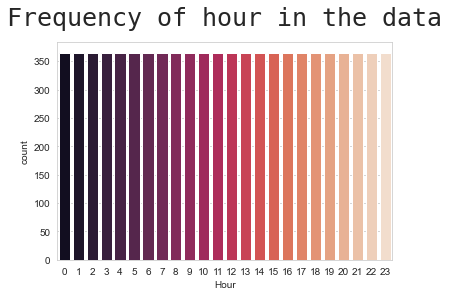

In [65]:
# Frequency of each hour in the data
plt.grid(axis='x',color='black', linestyle = ':', alpha=0.5)
plt.title('Frequency of hour in the data', fontname='monospace', fontsize=25, y=1.05)
a=sns.countplot(data=df,x="Hour",palette='rocket')
plt.show()

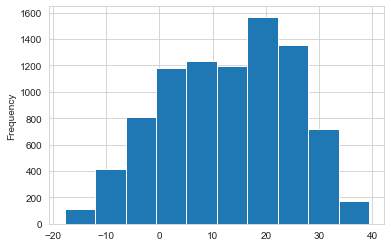

In [66]:
df['Temperature(°C)'].plot(kind='hist')
plt.show()

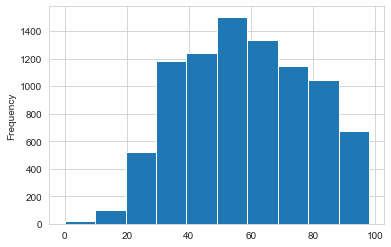

In [67]:
df['Humidity(%)'].plot(kind='hist')
plt.show()

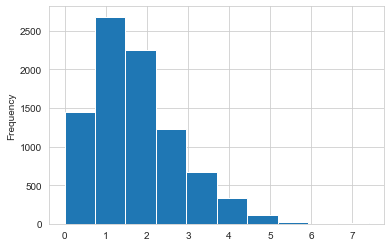

In [68]:
df['Wind speed (m/s)'].plot(kind='hist')
plt.show()

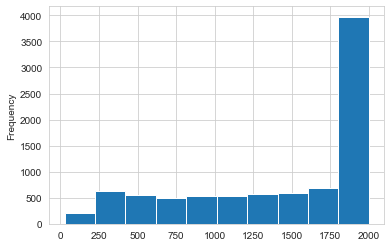

In [69]:
df['Visibility (10m)'].plot(kind='hist')
plt.show()

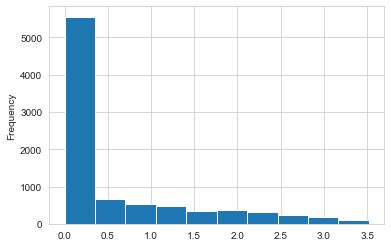

In [70]:
df['Solar Radiation (MJ/m2)'].plot(kind='hist')
plt.show()

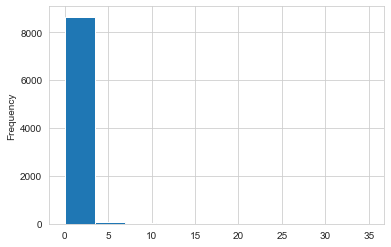

In [71]:
df['Rainfall(mm)'].plot(kind='hist')
plt.show()

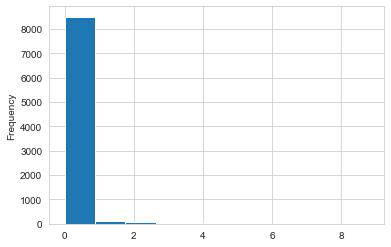

In [72]:
df['Snowfall (cm)'].plot(kind='hist')
plt.show()

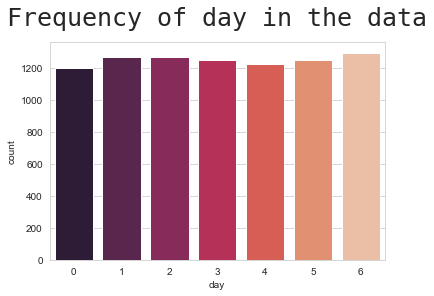

In [73]:
plt.grid(axis='x',color='black', linestyle = ':', alpha=0.5)
plt.title('Frequency of day in the data', fontname='monospace', fontsize=25, y=1.05)
a=sns.countplot(data=df,x='day',palette='rocket')
plt.show()

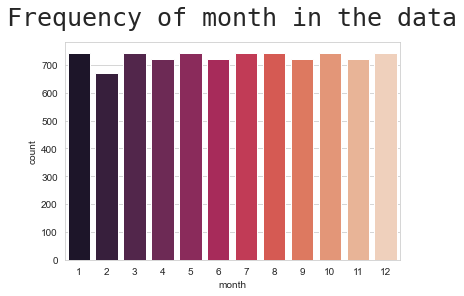

In [27]:
plt.grid(axis='x',color='black', linestyle = ':', alpha=0.5)
plt.title('Frequency of month in the data', fontname='monospace', fontsize=25, y=1.05)
a=sns.countplot(data=df,x="month",palette='rocket')
plt.show()

In [28]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1


### Bi-Variate and Multi-Variate Analysis

#### 1. Date vs Bike Count

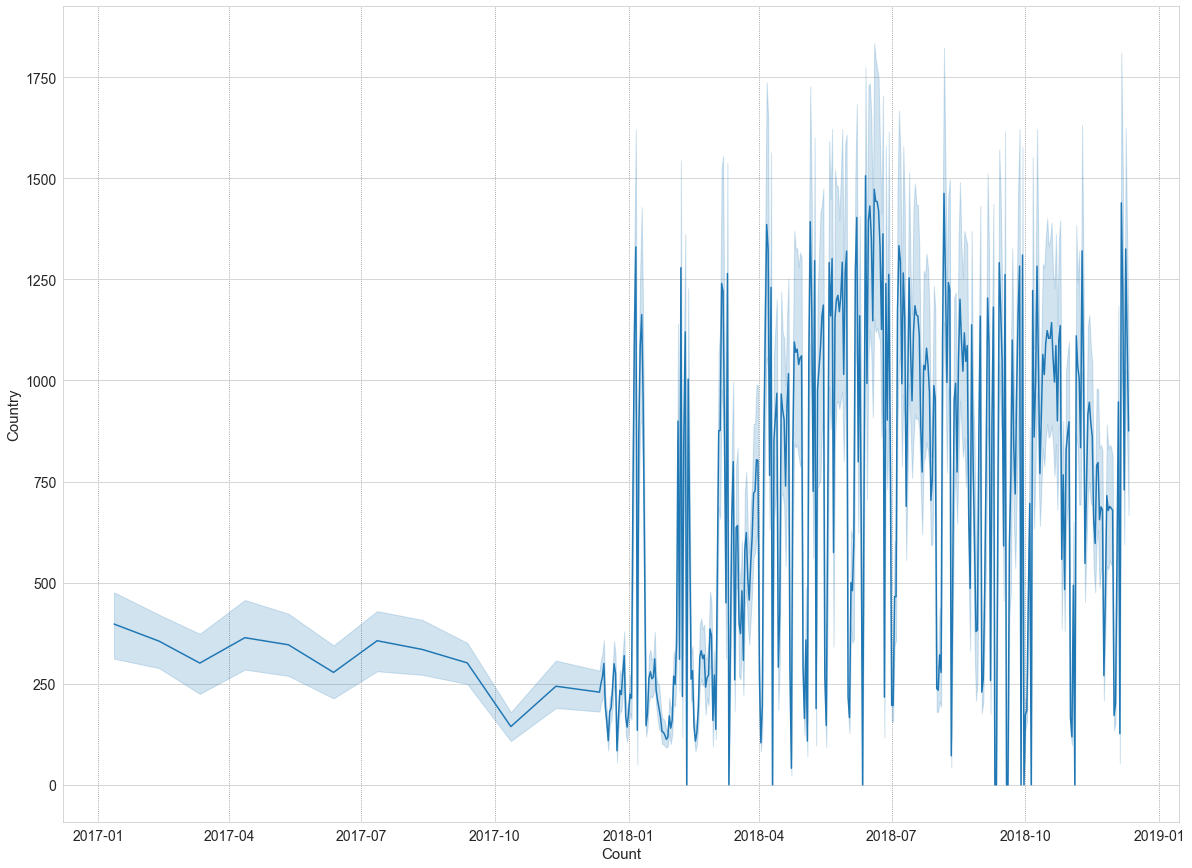

In [75]:
plt.figure(figsize=(20,15))
plt.grid(axis='x',color='black', linestyle = ':', alpha=0.5)
sns.lineplot(data=df,x='Date',y='Rented Bike Count')
plt.xlabel('Count', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


#### Inference: In general, the number of bike rents in 2017 was less than in 2018. The bike rents peaked in July 2018 then reduced slightly until December 2018.



In [76]:
## 2. Hour,Month,season,day vs Bike count

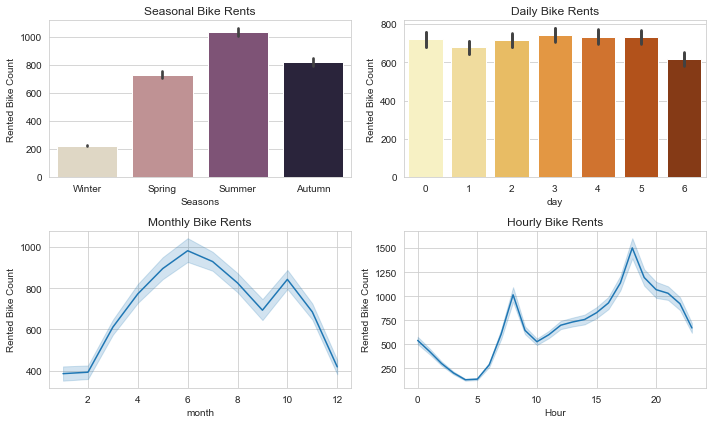

In [79]:
x = [['Seasons', 'day'], ['month', 'Hour']]
title = [['Seasonal Bike Rents', 'Daily Bike Rents'], 
         ['Monthly Bike Rents', 'Hourly Bike Rents']]

f, ax = plt.subplots(2,2,figsize=(10,6))

for i in range(2):
    for j in range(2):
        if i==0:
            sns.barplot(data=df, x=x[i][j], y='Rented Bike Count', ax=ax[i][j], palette='ch:s=-.2,r=.6')
            if j==1:
                sns.barplot(data=df, x=x[i][j], y='Rented Bike Count', ax=ax[i][j], palette='YlOrBr')

        else:
            sns.lineplot(data=df, x=x[i][j], y='Rented Bike Count', ax=ax[i][j])

        ax[i][j].set_title(title[i][j])

plt.tight_layout()

#### Inference: 
1.The highest number of bike rents occur in summer while the least bike rents occur in winter.  
2.From day to day basis, the trend of bike rents is almost similar with slight peaking demands  
on Thursday while drops on Sunday. 
3.In monthly basis, there are two peaks occur in June and October.   
4.In hourly basis, the bike counts peak in the afternoon (from 15.00 to 20.00).   
There are two peak occurences, at 7.00 and at 17.00, which is most likely to be caused by workers going to office in the morning and going back home in the afternoon.

The following is seasons in Seoul:

1.Spring (middle of March to the end of May)  
2.Summer (June to August)  
3.Autumn (September to November)  
4.Winter (Dec to middle of March)  

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

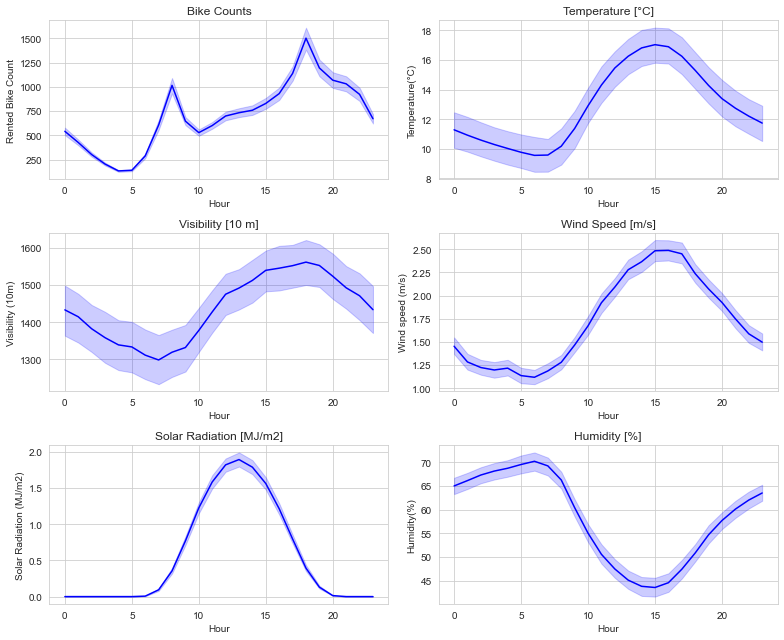

In [91]:
# Hour vs Rented Bike Count,Temperature,Visibility,Wind speed,Solar Radiation,Humidity
y = [['Rented Bike Count', 'Temperature(°C)'], ['Visibility (10m)', 'Wind speed (m/s)'], ['Solar Radiation (MJ/m2)', 'Humidity(%)']]
title = [['Bike Counts', 'Temperature [°C]'], ['Visibility [10 m]', 'Wind Speed [m/s]'], 
         ['Solar Radiation [MJ/m2]', 'Humidity [%]']]

f, ax = plt.subplots(3,2,figsize=(11,9))

for i in range(3):
    for j in range(2):
        sns.lineplot(data=df, x='Hour', y=y[i][j], ax=ax[i][j], color='b')
        ax[i][j].set_title(title[i][j])

plt.tight_layout()

#### Inference: 
The hourly movement of bike counts seems to correlate with temperature, visibility, windspeed, and humidity.  
The bike counts peak in the afternoon (from 15.00 to 20.00)  
where temperature is the highest, with the most visibility, windspeed, and least humidity.

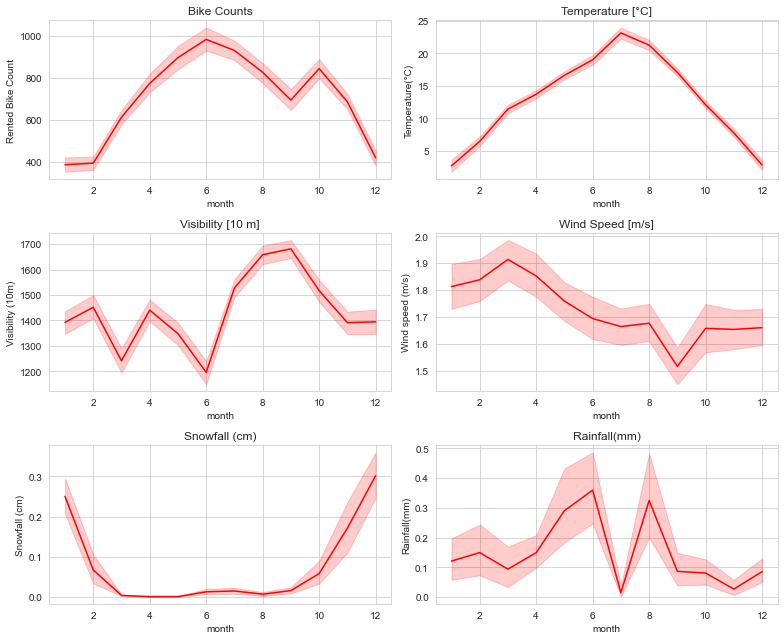

In [97]:
# month vs Rented Bike Count,Temperature,Visibility,Wind speed,Solar Radiation,Humidity
y = [['Rented Bike Count', 'Temperature(°C)'], ['Visibility (10m)', 'Wind speed (m/s)'], ['Snowfall (cm)', 'Rainfall(mm)']]
title = [['Bike Counts', 'Temperature [°C]'], ['Visibility [10 m]', 'Wind Speed [m/s]'], 
         ['Snowfall (cm)', 'Rainfall(mm)']]
f, ax = plt.subplots(3,2,figsize=(11,9))

for i in range(3):
    for j in range(2):
        sns.lineplot(data=df, x='month', y=y[i][j], ax=ax[i][j], color='r')
        ax[i][j].set_title(title[i][j])

plt.tight_layout()        

#### Inference:
The monthly movement of bike counts seems only to correlate with temperature.   
The movement of snowfall correlates with season i.e. high snowfall from January to March during winter season.   
However, there is a bizarre drop of rainfall in July. It seems there is no rain during the occassionally rainy season in July.

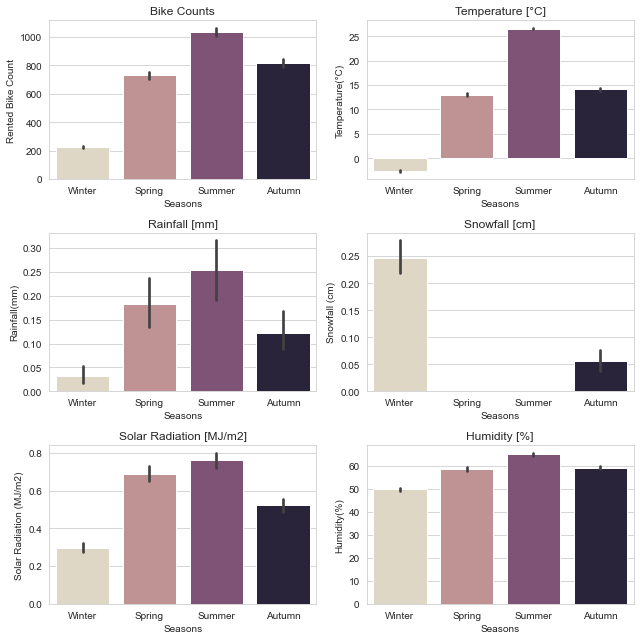

In [100]:
y = [['Rented Bike Count', 'Temperature(°C)'], ['Rainfall(mm)', 'Snowfall (cm)'], ['Solar Radiation (MJ/m2)', 'Humidity(%)']]
title = [['Bike Counts', 'Temperature [°C]'], ['Rainfall [mm]', 'Snowfall [cm]'], 
         ['Solar Radiation [MJ/m2]', 'Humidity [%]']]

f, ax = plt.subplots(3,2,figsize=(9,9))

for i in range(3):
    for j in range(2):
        sns.barplot(data=df, x='Seasons', y=y[i][j], ax=ax[i][j], palette='ch:s=-.2,r=.6')
        ax[i][j].set_title(title[i][j])

plt.tight_layout()  

### Inferences:
The seasonal movement of bike counts correlates very well with temperature, solar radiation, and humidity.  
The highest count of rented bikes occurs in summer, while the least occurs in winter.

## When did bike sharing not function

In [110]:
pd.pivot_table(df, index=['Holiday', 'Functioning Day'], columns='Seasons', values='Rented Bike Count',
               aggfunc=lambda x: len(x), margins=True, margins_name='TOTAL')

Seasons                     Autumn  Spring  Summer  Winter  TOTAL
Holiday    Functioning Day                                       
Holiday    No                 24.0     NaN     NaN     NaN     24
           Yes                96.0    72.0    48.0   192.0    408
No Holiday No                223.0    48.0     NaN     NaN    271
           Yes              1841.0  2088.0  2160.0  1968.0   8057
TOTAL                       2184.0  2208.0  2208.0  2160.0   8760

### Inferences:
In autumn, there are 24 records when that day is holiday but not functioning and 223 records when that day is a work day but not functioning  
In spring, there are 48 records when that day is work day but not functioning.  
In conclusion, the bike rents do not function on some days in autumn and spring.

### Is there a day when the bike share is temporarily down or not functioning?

In [122]:
dates = df[(df.Holiday=='No Holiday') & (df['Functioning Day']=='No')].Date.dt.date.unique()

In [123]:
dates

array([datetime.date(2018, 11, 4), datetime.date(2018, 10, 5),
       datetime.date(2018, 9, 18), datetime.date(2018, 9, 19),
       datetime.date(2018, 9, 28), datetime.date(2018, 9, 30),
       datetime.date(2018, 2, 10), datetime.date(2018, 4, 10),
       datetime.date(2018, 6, 10), datetime.date(2018, 3, 11),
       datetime.date(2018, 6, 11), datetime.date(2018, 9, 11)],
      dtype=object)

In [132]:
# On public holidays it keeps operating
df[(df.Holiday=='Holiday') & (df['Functioning Day']=='Yes')].Date.dt.date.unique()

array([datetime.date(2017, 12, 22), datetime.date(2017, 12, 24),
       datetime.date(2017, 12, 25), datetime.date(2017, 12, 31),
       datetime.date(2018, 1, 1), datetime.date(2018, 2, 15),
       datetime.date(2018, 2, 16), datetime.date(2018, 2, 17),
       datetime.date(2018, 1, 3), datetime.date(2018, 1, 5),
       datetime.date(2018, 5, 22), datetime.date(2018, 6, 6),
       datetime.date(2018, 8, 15), datetime.date(2018, 9, 23),
       datetime.date(2018, 9, 24), datetime.date(2018, 9, 25),
       datetime.date(2018, 3, 10)], dtype=object)

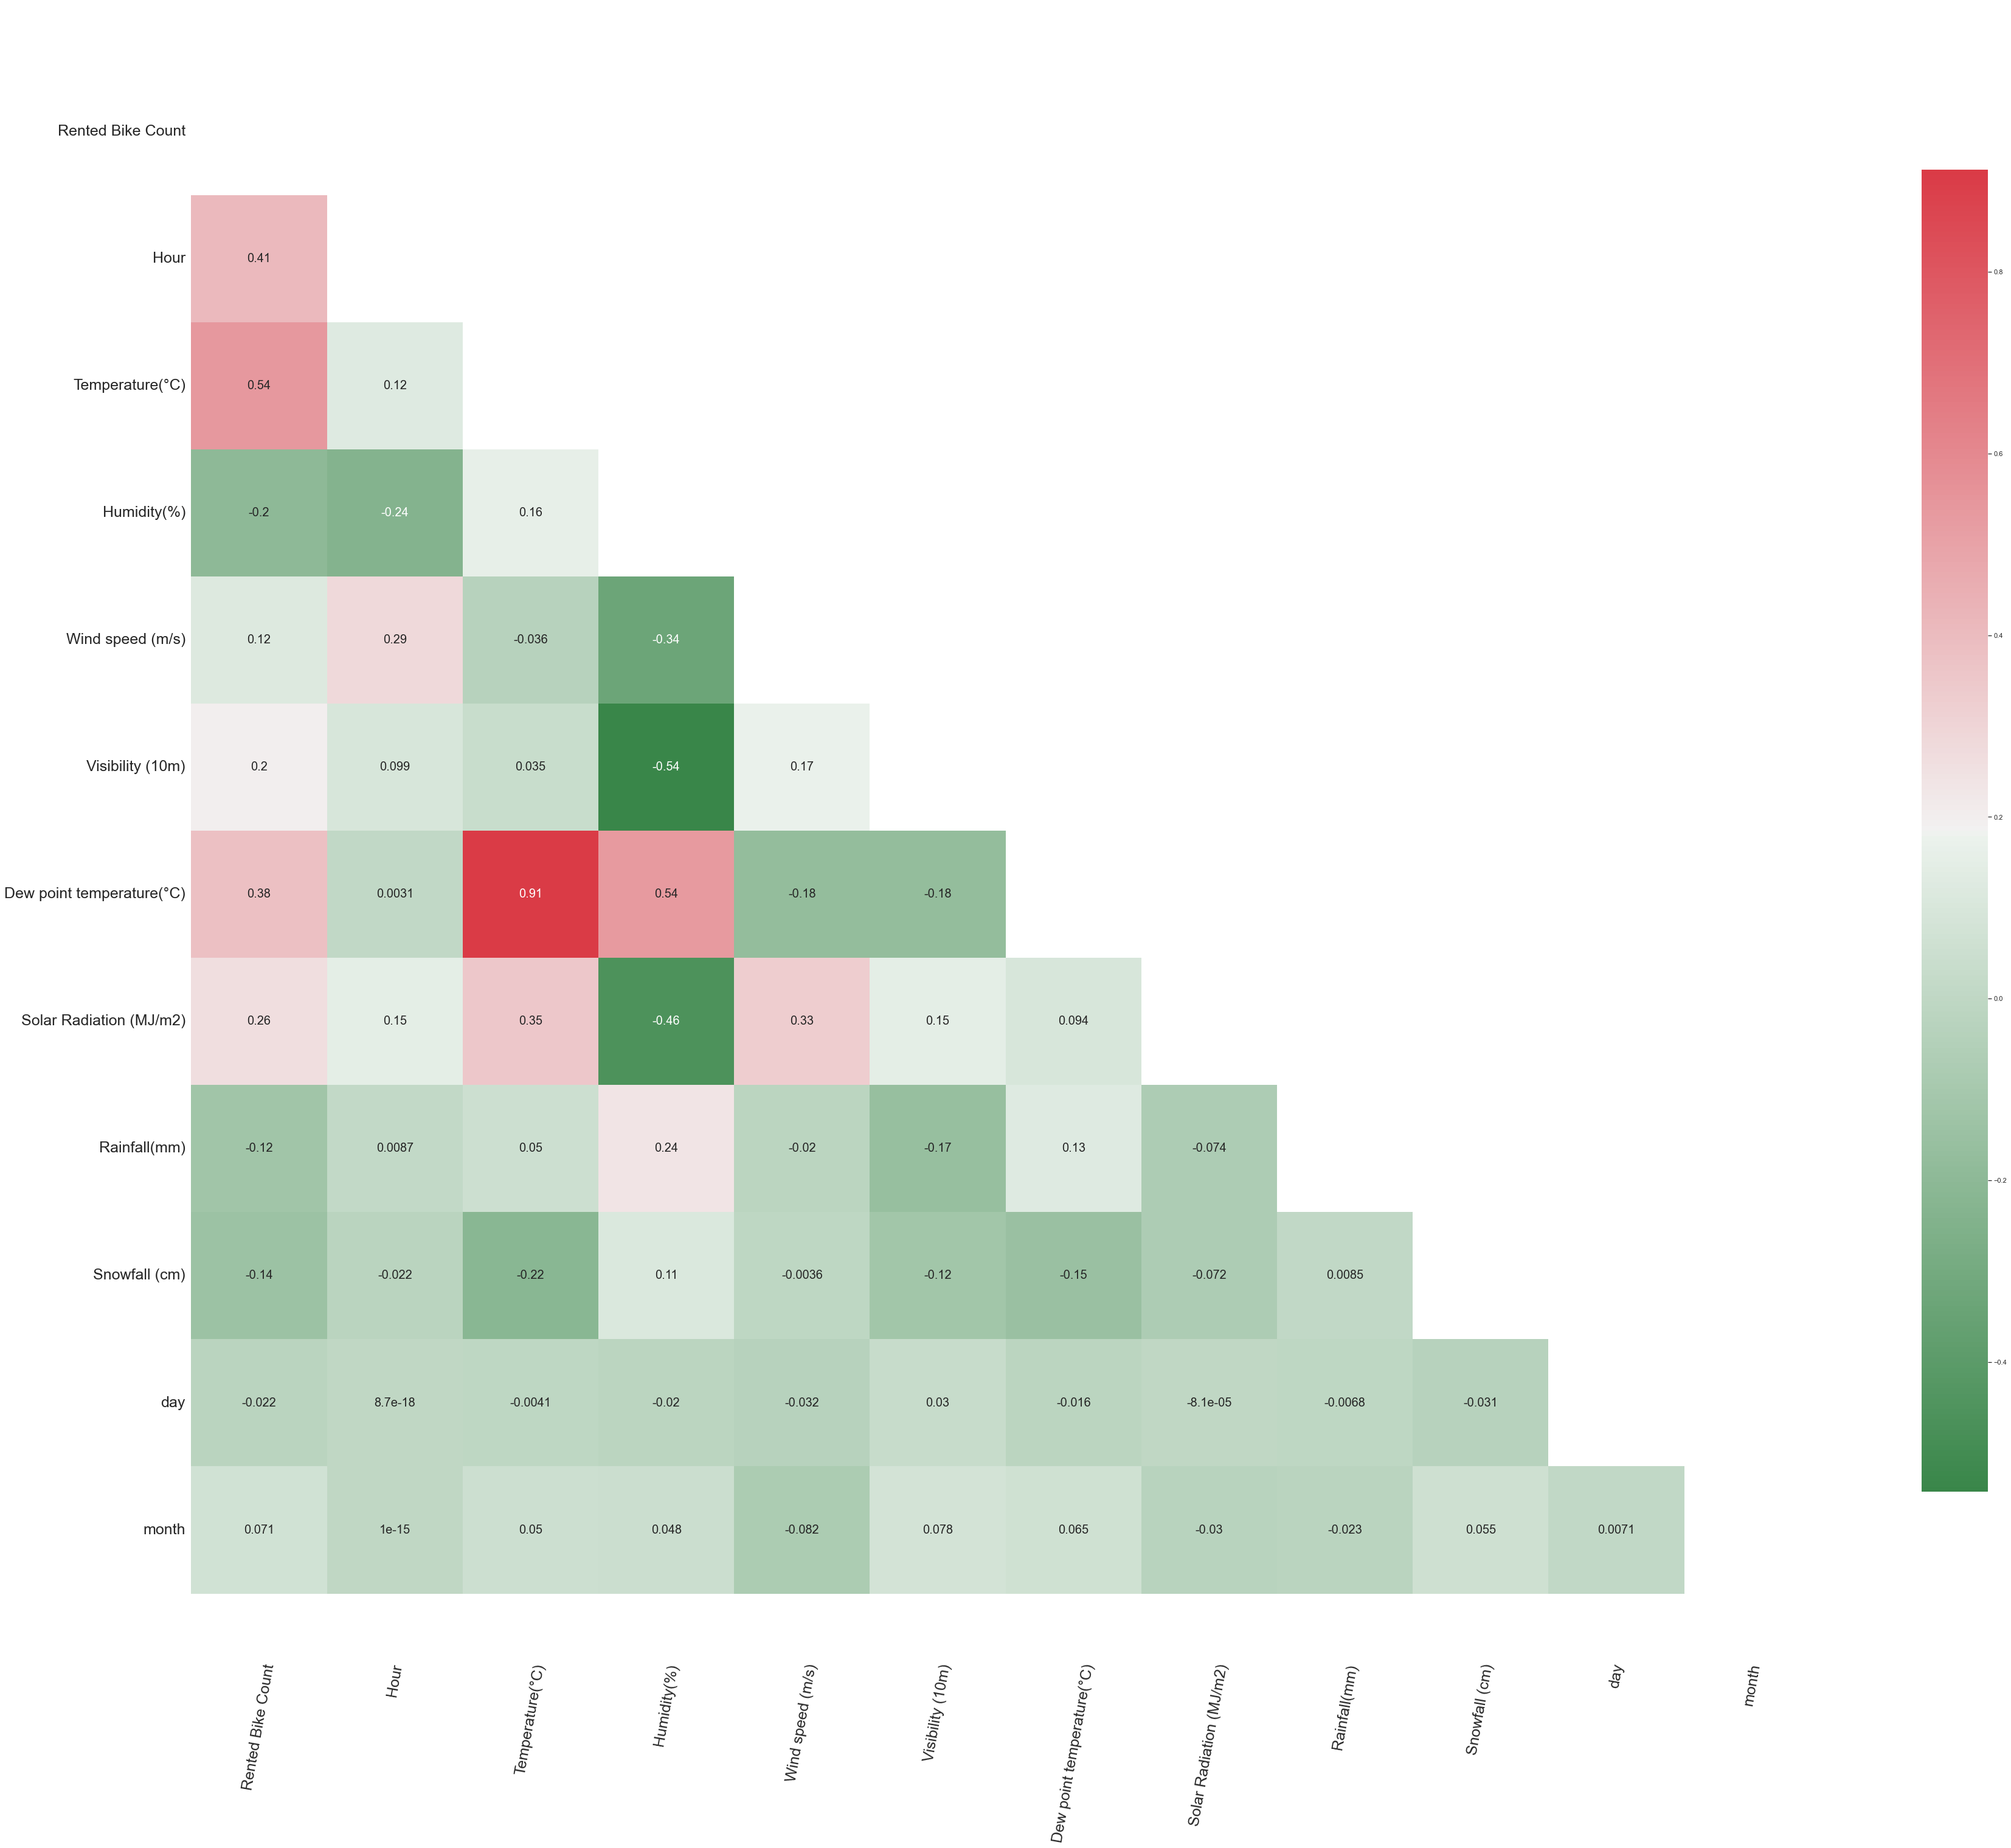

In [133]:
# Now that we have our features, let's plot them on a correlation matrix to remove anything that might 
# cause multi-colinearity within our model

sns.set(style="white")
# Creating the data
data = df.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":20},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               )

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);

plt.savefig('correlation_heatmap.png', transparent = True)

In [155]:
# printing the correlation of all the features in the dataset with respect to DEFAULT
df_default_corrs = data.iloc[:-1,0:1]


In [157]:
df_default_corrs

,Rented Bike Count
Rented Bike Count,1.000000
Hour,0.410257
Temperature(°C),0.538558
Humidity(%),-0.199780
Wind speed (m/s),0.121108
Visibility (10m),0.199280
Dew point temperature(°C),0.379788
Solar Radiation (MJ/m2),0.261837
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804


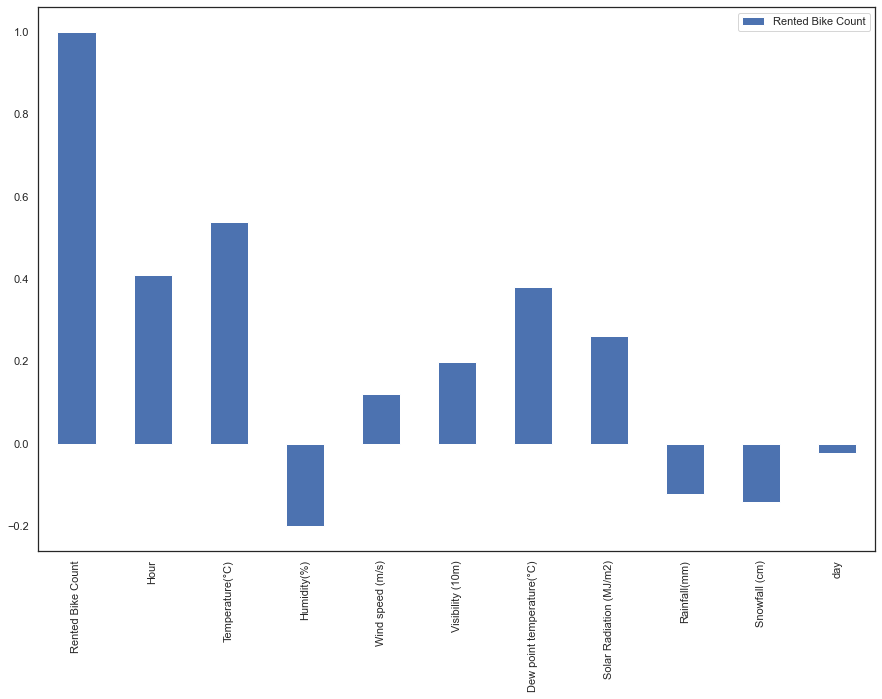

In [156]:
df_default_corrs.plot(kind='bar',figsize=(15,10))
plt.show()

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Rented Bike Count'}>,
        <AxesSubplot:title={'center':'Hour'}>,
        <AxesSubplot:title={'center':'Temperature(°C)'}>],
       [<AxesSubplot:title={'center':'Humidity(%)'}>,
        <AxesSubplot:title={'center':'Wind speed (m/s)'}>,
        <AxesSubplot:title={'center':'Visibility (10m)'}>,
        <AxesSubplot:title={'center':'Dew point temperature(°C)'}>],
       [<AxesSubplot:title={'center':'Solar Radiation (MJ/m2)'}>,
        <AxesSubplot:title={'center':'Rainfall(mm)'}>,
        <AxesSubplot:title={'center':'Snowfall (cm)'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

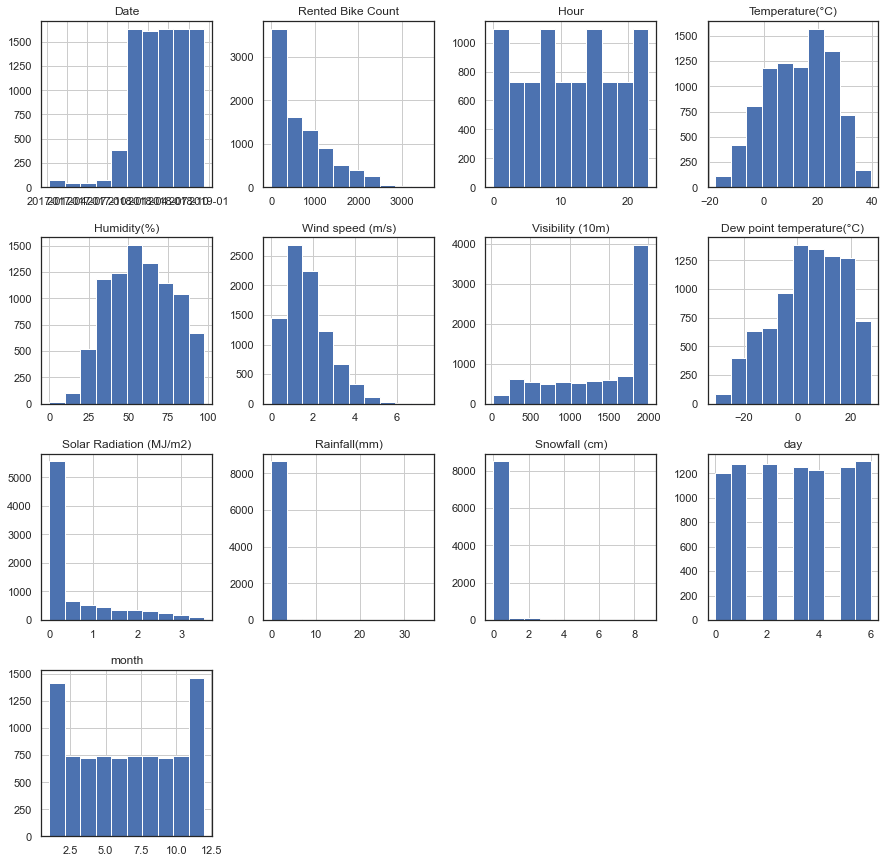

In [159]:
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df,ax=ax)

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

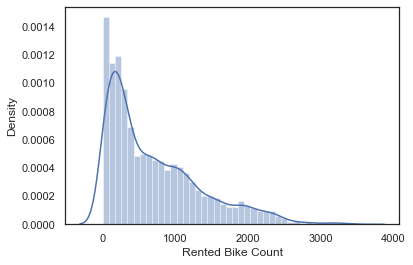

In [160]:
sns.distplot(df['Rented Bike Count'])

In [16]:
df.to_pickle('before_ohe_df.pkl')

In [74]:
df1=pd.get_dummies(df)

In [75]:
df1

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,day,month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,3,1,0,0,0,1,0,1,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,3,1,0,0,0,1,0,1,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,3,1,0,0,0,1,0,1,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,3,1,0,0,0,1,0,1,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,3,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,...,4,11,1,0,0,0,0,1,0,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,...,4,11,1,0,0,0,0,1,0,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,...,4,11,1,0,0,0,0,1,0,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,...,4,11,1,0,0,0,0,1,0,1


### Model Building

In [76]:
X = df1.drop(columns=['Rented Bike Count', 'Date'])
y = df1['Rented Bike Count']

In [296]:
## Scale data
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

In [297]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)


In [216]:
# Algorithms
linreg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
Dtree = DecisionTreeRegressor()
rfreg = RandomForestRegressor()
xreg= XGBRegressor()

In [217]:
# parameters
kfold = KFold(n_splits = 5)
scoring = 'r2'
algo_list = list([linreg,lasso,ridge,Dtree,rfreg,xreg])
algo_name = list(['Linear regression','lasso','ridge','Decision tree','Random Forest','XGBoost'])

In [218]:
# Buliding models on various algorithms
def model_building(algo,X,y,fold,scoring):
    algo_score = []
    for i in algo:
        score = cross_val_score(i, X, y, cv=fold, scoring=scoring).mean()
        algo_score.append(score)
    return algo_score

In [219]:
result = model_building(algo_list, X_train_val, y_train_val, kfold, scoring)

In [220]:
cv_score = dict(zip(algo_name,result))

In [221]:
cv_score

{'Linear regression': 0.5452299362758171,
 'lasso': 0.5453838959865591,
 'ridge': 0.5454621259508938,
 'Decision tree': 0.7883201966746691,
 'Random Forest': 0.8942872714428105,
 'XGBoost': 0.9071661525649309}

## Inferences:
We got XGBoost Regressor with highest R^2 square value of 90.716

## HyperParameter Tuning for XGBoost Regressor

In [81]:
X = df1.drop(columns=['Rented Bike Count', 'Date'])
y = df1['Rented Bike Count']

In [304]:
## Scale data
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

In [305]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)


In [313]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = XGBRegressor()
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='r2',
                   cv=10,
                   verbose=1)
clf.fit(X_train_val, y_train_val)
print("Best parameters:", clf.best_params_)
print("R^2 Score: ", clf.best_score_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000}
R^2 Score:  0.918725861161092


### Again Training the model with best parameters found by gridsearchCV

In [77]:
X = df1.drop(columns=['Rented Bike Count', 'Date'])
y = df1['Rented Bike Count']
## Scale data
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

xreg2=XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.01, max_depth= 10, n_estimators= 1000)
xreg2.fit(X_train,y_train)
# Cross-validation
cv = cross_val_score(xreg2, X_train, y_train, cv=10)
print('10 Fold Scores:', cv)
print('Mean R2', np.mean(cv))

10 Fold Scores: [0.89569493 0.920536   0.90891589 0.91486387 0.91803995 0.92661212
 0.92541464 0.90561306 0.90620153 0.93278841]
Mean R2 0.9154680415593612


In [25]:
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),day,month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,0,0,0,1,0,1,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,0,0,0,1,0,1,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,0,0,0,1,0,1,0,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,0,0,0,1,0,1,0,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,4,11,1,0,0,0,0,1,0,1
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,4,11,1,0,0,0,0,1,0,1
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,4,11,1,0,0,0,0,1,0,1
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,4,11,1,0,0,0,0,1,0,1


In [46]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [78]:
with open('Final_model', 'wb') as files:
    pickle.dump(xreg2, files)

In [79]:
with open('Final_model' , 'rb') as f:
    lr = pickle.load(f)

## Testing the model on 20% Percent Dataset

In [322]:

#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))
# fit the model
lr.fit(X_train,y_train)

# Create prediction variable for test set
model_test_pred = lr.predict(X_test)

# Check accuracy of test
print("Linear Regression Test Scores:\n")
print("Linear Regression MAE: {}".format(mae(y_test, model_test_pred))) # MAE
print("Linear Regression MSE: {}".format(mean_squared_error(y_test, model_test_pred))) # Mean Squared Error (MSE)
print("Linear Regression RMSE: {}".format(RMSE(y_test, model_test_pred))) # Root Mean squared error
print("Linear Regression R2 Score: {}".format(r2_score(y_test, model_test_pred)))# R^2 Score

Linear Regression Test Scores:

Linear Regression MAE: 108.10352052075723
Linear Regression MSE: 33505.57159660991
Linear Regression RMSE: 183.04527198649492
Linear Regression R2 Score: 0.9158651474512927


## Checking Regression Assumptions  
### 1.Residual Plot
### 2.QQ Plot

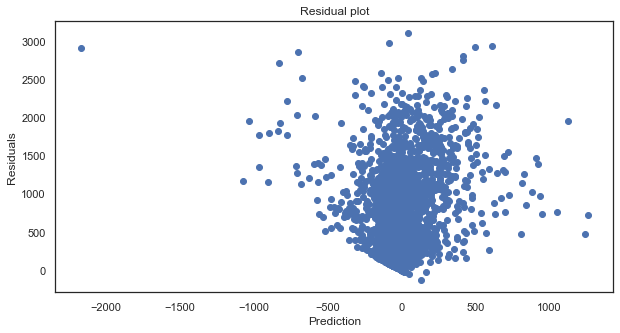

In [332]:
# Defining Graph size
plt.figure(figsize=(10,5))

# Defining the residue and model predicted results
y_pred= lr.predict(X_test)


# Plot your predicted values on the x-axis, and your residuals on the y-axis on Residue Plot
plt.scatter(y_test-y_pred,y_pred)
plt.title("Residual plot")
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.show()

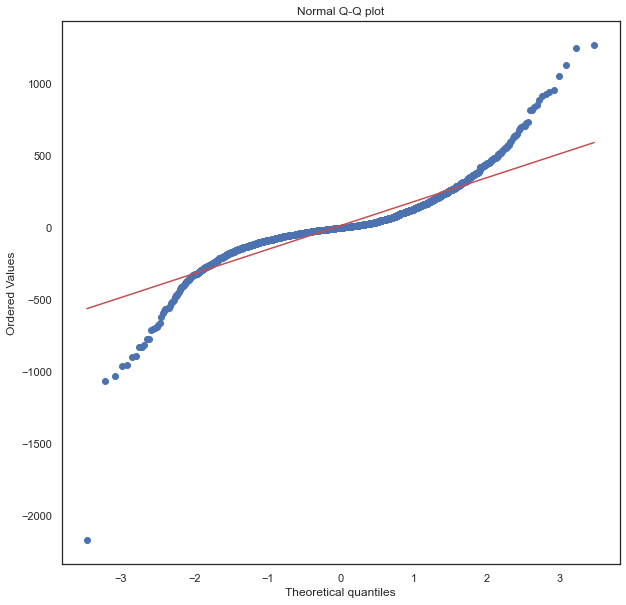

In [343]:
# Defining the residue and model predicted results
y_pred= lr.predict(X_test)


# diagnose/inspect residual normality using QQplot:
plt.figure(figsize=(10,10))
stats.probplot(y_test-y_pred, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

## Logged Bike Rent Count Model

In [47]:
df3_log=df1[df1['Rented Bike Count']!=0]

In [48]:
# Logging Rented Bike Count
df3_log['Rented Bike Count'] = df3_log['Rented Bike Count'].apply(np.log)

In [49]:
X = df3_log.drop(columns=['Rented Bike Count', 'Date'])
y = df3_log['Rented Bike Count']

In [50]:
## Scale data
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# Train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=10)


In [51]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = XGBRegressor()
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='r2',
                   cv=10,
                   verbose=1)
clf.fit(X_train1, y_train1)
print("Best parameters:", clf.best_params_)
print("R^2 Score: ", clf.best_score_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 1000}
R^2 Score:  0.8968270671413577


In [52]:
X = df3_log.drop(columns=['Rented Bike Count', 'Date'])
y = df3_log['Rented Bike Count']
## Scale data
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

xreg2=XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.05, max_depth= 10, n_estimators= 1000)

# Cross-validation
cv = cross_val_score(xreg2, X_train, y_train, cv=10)
print('10 Fold Scores:', cv)
print('Mean R2', np.mean(cv))

10 Fold Scores: [0.90795859 0.89030104 0.88437169 0.87328208 0.89761327 0.90764757
 0.89736668 0.90861354 0.87569831 0.9254179 ]
Mean R2 0.8968270671413577


## Testing the model on 20% Percent Dataset

In [56]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))
# fit the model
xreg2=XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.05, max_depth= 10, n_estimators= 1000)
xreg2.fit(X_train,y_train)

# Create prediction variable for test set
model_test_pred = xreg2.predict(X_test)

# Check accuracy of test
print("Linear Regression Test Scores:\n")
print("Linear Regression MAE: {}".format(mae(y_test, model_test_pred))) # MAE
print("Linear Regression MSE: {}".format(mean_squared_error(y_test, model_test_pred))) # Mean Squared Error (MSE)
print("Linear Regression RMSE: {}".format(RMSE(y_test, model_test_pred))) # Root Mean squared error
print("Linear Regression R2 Score: {}".format(r2_score(y_test, model_test_pred)))# R^2 Score

Linear Regression Test Scores:

Linear Regression MAE: 0.21358128778025193
Linear Regression MSE: 0.12879779857333762
Linear Regression RMSE: 0.35888410186763303
Linear Regression R2 Score: 0.9098354810033533


## Checking Regression Assumptions  
### 1.Residual Plot
### 2.QQ Plot

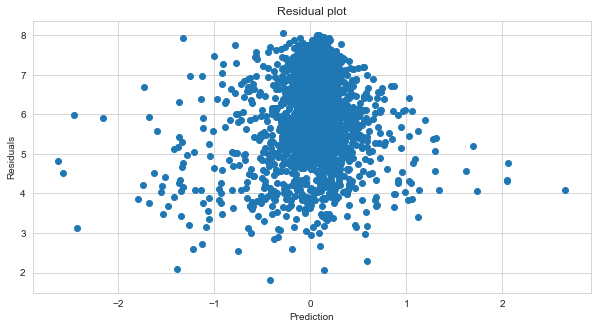

In [64]:
# Defining Graph size
plt.figure(figsize=(10,5))

# Defining the residue and model predicted results
y_pred1= xreg2.predict(X_test)


# Plot your predicted values on the x-axis, and your residuals on the y-axis on Residue Plot
plt.scatter(y_test-y_pred1,y_pred1)
plt.title("Residual plot")
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.show()

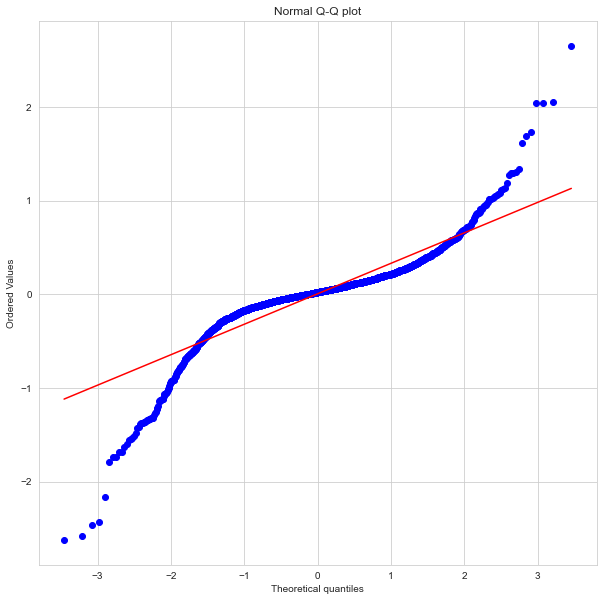

In [67]:
# Defining the residue and model predicted results
y_pred2= xreg2.predict(X_test)


# diagnose/inspect residual normality using QQplot:
plt.figure(figsize=(10,10))
stats.probplot(y_test-y_pred2, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [23]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11


In [36]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11


In [37]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),day,month
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,3.021918,6.526027
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.999994,3.448048
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,4.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,3.000000,7.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,5.000000,10.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,6.000000,12.000000


In [48]:
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),day,month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,0,0,0,1,0,1,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,0,0,0,1,0,1,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,0,0,0,1,0,1,0,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,0,0,0,1,0,1,0,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,4,11,1,0,0,0,0,1,0,1
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,4,11,1,0,0,0,0,1,0,1
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,4,11,1,0,0,0,0,1,0,1
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,4,11,1,0,0,0,0,1,0,1


In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   day                        8760 non-null   int64  
 10  month                      8760 non-null   int64  
 11  Seasons_Autumn             8760 non-null   uint8  
 12  Seasons_Spring             8760 non-null   uint8  
 13  Seasons_Summer             8760 non-null   uint8

In [42]:
df1

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,day,month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,3,1,0,0,0,1,0,1,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,3,1,0,0,0,1,0,1,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,3,1,0,0,0,1,0,1,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,3,1,0,0,0,1,0,1,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,3,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,...,4,11,1,0,0,0,0,1,0,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,...,4,11,1,0,0,0,0,1,0,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,...,4,11,1,0,0,0,0,1,0,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,...,4,11,1,0,0,0,0,1,0,1
